<a href="https://colab.research.google.com/github/andremarinho17/data_analytics_projects_en/blob/main/TikTok_Project_Applying_advanced_machine_larning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TikTok Project: Applying advanced machine larning models**

<p align="center"><img src="https://logodownload.org/wp-content/uploads/2019/08/tiktok-logo-9.png" height="150px">

**Course 6 - The Nuts and bolts of machine learning**

**Author: André Marinho**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**


# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.



## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

* The task is to build a machine learning model that accurately classifies TikTok videos as either containing a "claim" or offering an "opinion." To evaluate the success of this model, key metrics to consider include accuracy, precision, recall, and F1-score. Given the importance of minimizing false negatives (missed claims), a high recall score will be particularly critical. Additionally, tracking user satisfaction and the rate of successfully resolved reports can serve as important business metrics.



2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
*   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

       If the model predicts a false negative, stating that a video does not contain a claim when it actually does, the video could remain unaddressed by the moderation team. This may allow misleading or harmful content to proliferate on the platform, potentially damaging users' trust in TikTok and exposing them to misinformation.


  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

      Conversely, if the model predicts a false positive, claiming that a video contains a claim when it actually does not, the video may be incorrectly flagged for review. This could lead to unnecessary moderation actions, causing frustration for creators and users alike. Over time, it could diminish user engagement and satisfaction with the platform, as users may feel their content is unfairly scrutinized.



3.   **How would you proceed?**

     To proceed, I would first gather a diverse dataset of TikTok videos labeled as "claim" or "opinion" and preprocess it to ensure quality. Next, I would engineer relevant features, before developing and training various models, including decision trees, random forest and XGBoost, to determine the best performer. After evaluating the models using precision, recall, and F1-score, particularly focusing on minimizing false negatives, I would implement the chosen model in a controlled environment, continuously monitor its performance, and refine it based on real-time feedback and metrics. This structured approach will ensure effective content moderation while addressing ethical considerations.




### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [ ]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# Load dataset into dataframe
df = pd.read_csv("tiktok_dataset.csv")


## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [ ]:
# Display first few rows
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [ ]:
# Get number of rows and columns
df.shape

(19382, 12)

Get the data types of the columns.

In [ ]:
# Get data types of columns
df.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


Get basic information about the dataset.

In [ ]:
# Get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [ ]:
# Generate basic descriptive stats
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [ ]:
# Check for missing values
df.isna().sum()

,0
#,0
claim_status,298
video_id,0
video_duration_sec,0
video_transcription_text,298
verified_status,0
author_ban_status,0
video_view_count,298
video_like_count,298
video_share_count,298


In [ ]:
# Drop rows with missing values
df = df.dropna(axis=0)

In [ ]:
# Display first few rows after handling missing values
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

Check for and handle outliers.

Tree-based models are robust to outliers, so there is no need to check and handle them.

Check class balance.

In [ ]:
# Check class balance
df['claim_status'].value_counts() / df.shape[0] * 100

,count
claim_status,
claim,50.345839
opinion,49.654161


As can be seen, the model is perfectly balanced.


## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [ ]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df.loc[:, 'text_length'] = df['video_transcription_text'].str.len()
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Calculate the average text_length for claims and opinions.

In [ ]:
# Calculate the average text_length for claims and opinions
print('Average text length for claims:', df[df['claim_status'] == "claim"]['text_length'].mean())
print('Average text length for opinions:', df[df['claim_status'] == "opinion"]['text_length'].mean())

Average text length for claims: 95.37697751873439
Average text length for opinions: 82.72256226255804


Visualize the distribution of `text_length` for claims and opinions.

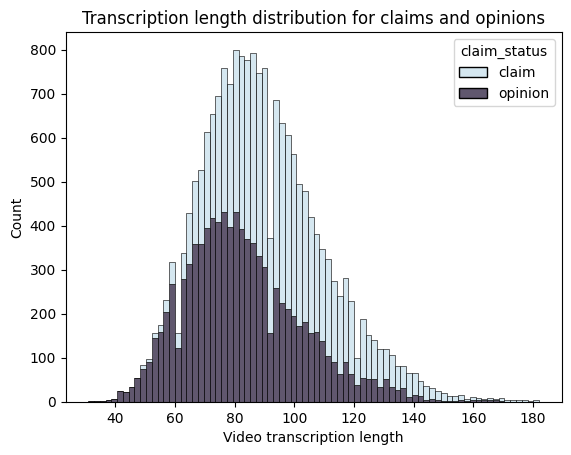

In [ ]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
sns.histplot(data=df, stat="count", multiple="stack", x="text_length", kde=False,
             palette="ch:s=.25,rot=-.25", hue="claim_status", element="bars", legend=True)

plt.xlabel("Video transcription length")
plt.ylabel("Count")
plt.title("Transcription length distribution for claims and opinions")
plt.show()

As can be noted, both classes have a similar bell-shaped distribution, but claims tend to have slightly longer transcriptions on average, peaking around 80 words. Opinions are more concentrated in shorter lengths, with their peak slightly below 80 words.

**Feature selection and transformation**

Encode target and catgorical variables.

In [ ]:
# Create a copy of the X data
X = df.copy()

# Drop unnecessary columns
X = X.drop(['#', 'video_id', 'video_transcription_text'], axis = 1)

# Encode target variable
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})

# Dummy encode remaining categorical values
X = pd.get_dummies(X, columns = ['verified_status', 'author_ban_status'], drop_first=True)
X.head()

<ipython-input-18-3b4807a9c1ce>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})


,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### **Task 4: Split the data**

Assign target variable.

In [ ]:
# Isolate target variable
y = X['claim_status']

Isolate the features.

In [ ]:
# Isolate features
X = X.drop(['claim_status'], axis = 1)

# Display first few rows of features dataframe
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [ ]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [ ]:
# Get shape of each training, validation, and testing set
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 10), (3817, 10), (3817, 10), (11450,), (3817,), (3817,))

Both the number of features and the number of rows align between training, test and validation sets.

### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [ ]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None],
    'bootstrap': [True],
    'random_state': [42],
    'criterion': ['gini'],
    'class_weight': [None]
}

# Define a dictionary of scoring metrics to capture
scoring=['precision','f1','recall','accuracy']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [ ]:
%%time
# Examine best recall score
rf_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CPU times: user 2min 28s, sys: 264 ms, total: 2min 28s
Wall time: 2min 33s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True], 'class_weight': [None],
                         'criterion': ['gini'], 'max_depth': [5, 7],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [50, 100],
                         'random_state': [42]},
             refit='recall', scoring=['precision', 'f1', 'recall', 'accuracy'])

In [ ]:
# Get all the results from the CV and put them in a df
cv_results = rf_cv.cv_results_
df_results = pd.DataFrame(cv_results)
print(df_results[['param_n_estimators', 'param_max_depth', 'mean_test_precision', 'std_test_precision']])

# Isolate the row of the df with the max(mean precision score)
best_precision_row = df_results.loc[df_results['mean_test_precision'].idxmax()]
best_precision = best_precision_row['mean_test_precision']
print(f"Best precision mean: {best_precision}")

    param_n_estimators  param_max_depth  mean_test_precision  \
0                   50                5             0.999479   
1                  100                5             0.999479   
2                   50                5             0.999479   
3                  100                5             0.999479   
4                   50                5             0.999479   
5                  100                5             0.999479   
6                   50                5             0.999479   
7                  100                5             0.999479   
8                   50                5             0.999479   
9                  100                5             0.999479   
10                  50                5             0.999479   
11                 100                5             0.999479   
12                  50                5             0.999479   
13                 100                5             0.999479   
14                  50                5 

In [ ]:
rf_cv.best_score_

0.991026002107111

In [ ]:
# Examine best parameters
rf_cv.best_params_

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 42}

**Question:** How well is your model performing? Consider average recall score and precision score.

The model has an average precision of 0.9994 and an average recall of 0.9910 across the five cross-validation folds, which means that the model is making good classifications both for claims and opinions.

### **Build an XGBoost model**

In [ ]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state = 0)

# Create a dictionary of hyperparameters to tune
cv_params = {
    'max_depth': [4, 8, 12],
    'min_child_weight': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [200, 300]
}

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [ ]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 1min 8s, sys: 883 ms, total: 1min 9s
Wall time: 40.9 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [200, 300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
# Get all the results from the CV and put them in a df
cv_results = xgb_cv.cv_results_
df_xgb_cv_results = pd.DataFrame(cv_results)
print(df_xgb_cv_results[['param_n_estimators', 'param_max_depth', 'mean_test_precision', 'std_test_precision']])

# Isolate the row of the df with the max(mean precision score)
best_precision_row = df_xgb_cv_results.loc[df_xgb_cv_results['mean_test_precision'].idxmax()]
best_precision = best_precision_row['mean_test_precision']
print(f"Best precision mean: {best_precision}")

    param_n_estimators  param_max_depth  mean_test_precision  \
0                  200                4             0.999476   
1                  300                4             0.999825   
2                  200                4             1.000000   
3                  300                4             1.000000   
4                  200                8             0.999476   
5                  300                8             0.999825   
6                  200                8             1.000000   
7                  300                8             1.000000   
8                  200               12             0.999476   
9                  300               12             0.999825   
10                 200               12             1.000000   
11                 300               12             1.000000   
12                 200                4             0.999128   
13                 300                4             0.998780   
14                 200                4 

In [ ]:
xgb_cv.best_score_

0.9898176171763818

In [ ]:
xgb_cv.best_params_


{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 200}

**Question:** How well does your model perform? Consider recall score and precision score.

The model has a perfect average precision of 1 and an average recall of 0.9898 across the five cross-validation folds. Although the results are slightly smaller than the random forest model, the model is making good classifications both for claims and opinions as well.

### **Build an Decision tree model**

In [ ]:
# Instantiate the XGBoost classifier
decision_tree = DecisionTreeClassifier(random_state = 42)

# Create a dictionary of hyperparameters to tune
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
clf = GridSearchCV(decision_tree,
                  tree_para,
                  scoring = scoring,
                  cv = 5,
                  refit = 'recall')

In [ ]:
%%time
clf.fit(X_train, y_train)

CPU times: user 59.1 s, sys: 127 ms, total: 59.3 s
Wall time: 1min


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, random_state=42)

In [ ]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9912


In [ ]:
results = pd.DataFrame(columns=[])

def make_results(model_name, model_object):

    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

In [ ]:
result_table = make_results("Tuned Decision Tree", clf)

In [ ]:
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.995231,0.991199,0.999304,0.995197


The model presents a precision of 0.99 and a recall of 0.9912 across the five cross-validation folds, which means that the model is also making good classifications both for claims and opinions. In addition, the results are slightly better than the random forest and the XGBoost model.

Next, the decision tree will be ploted to pinpoint where the splits in the data are occurring.

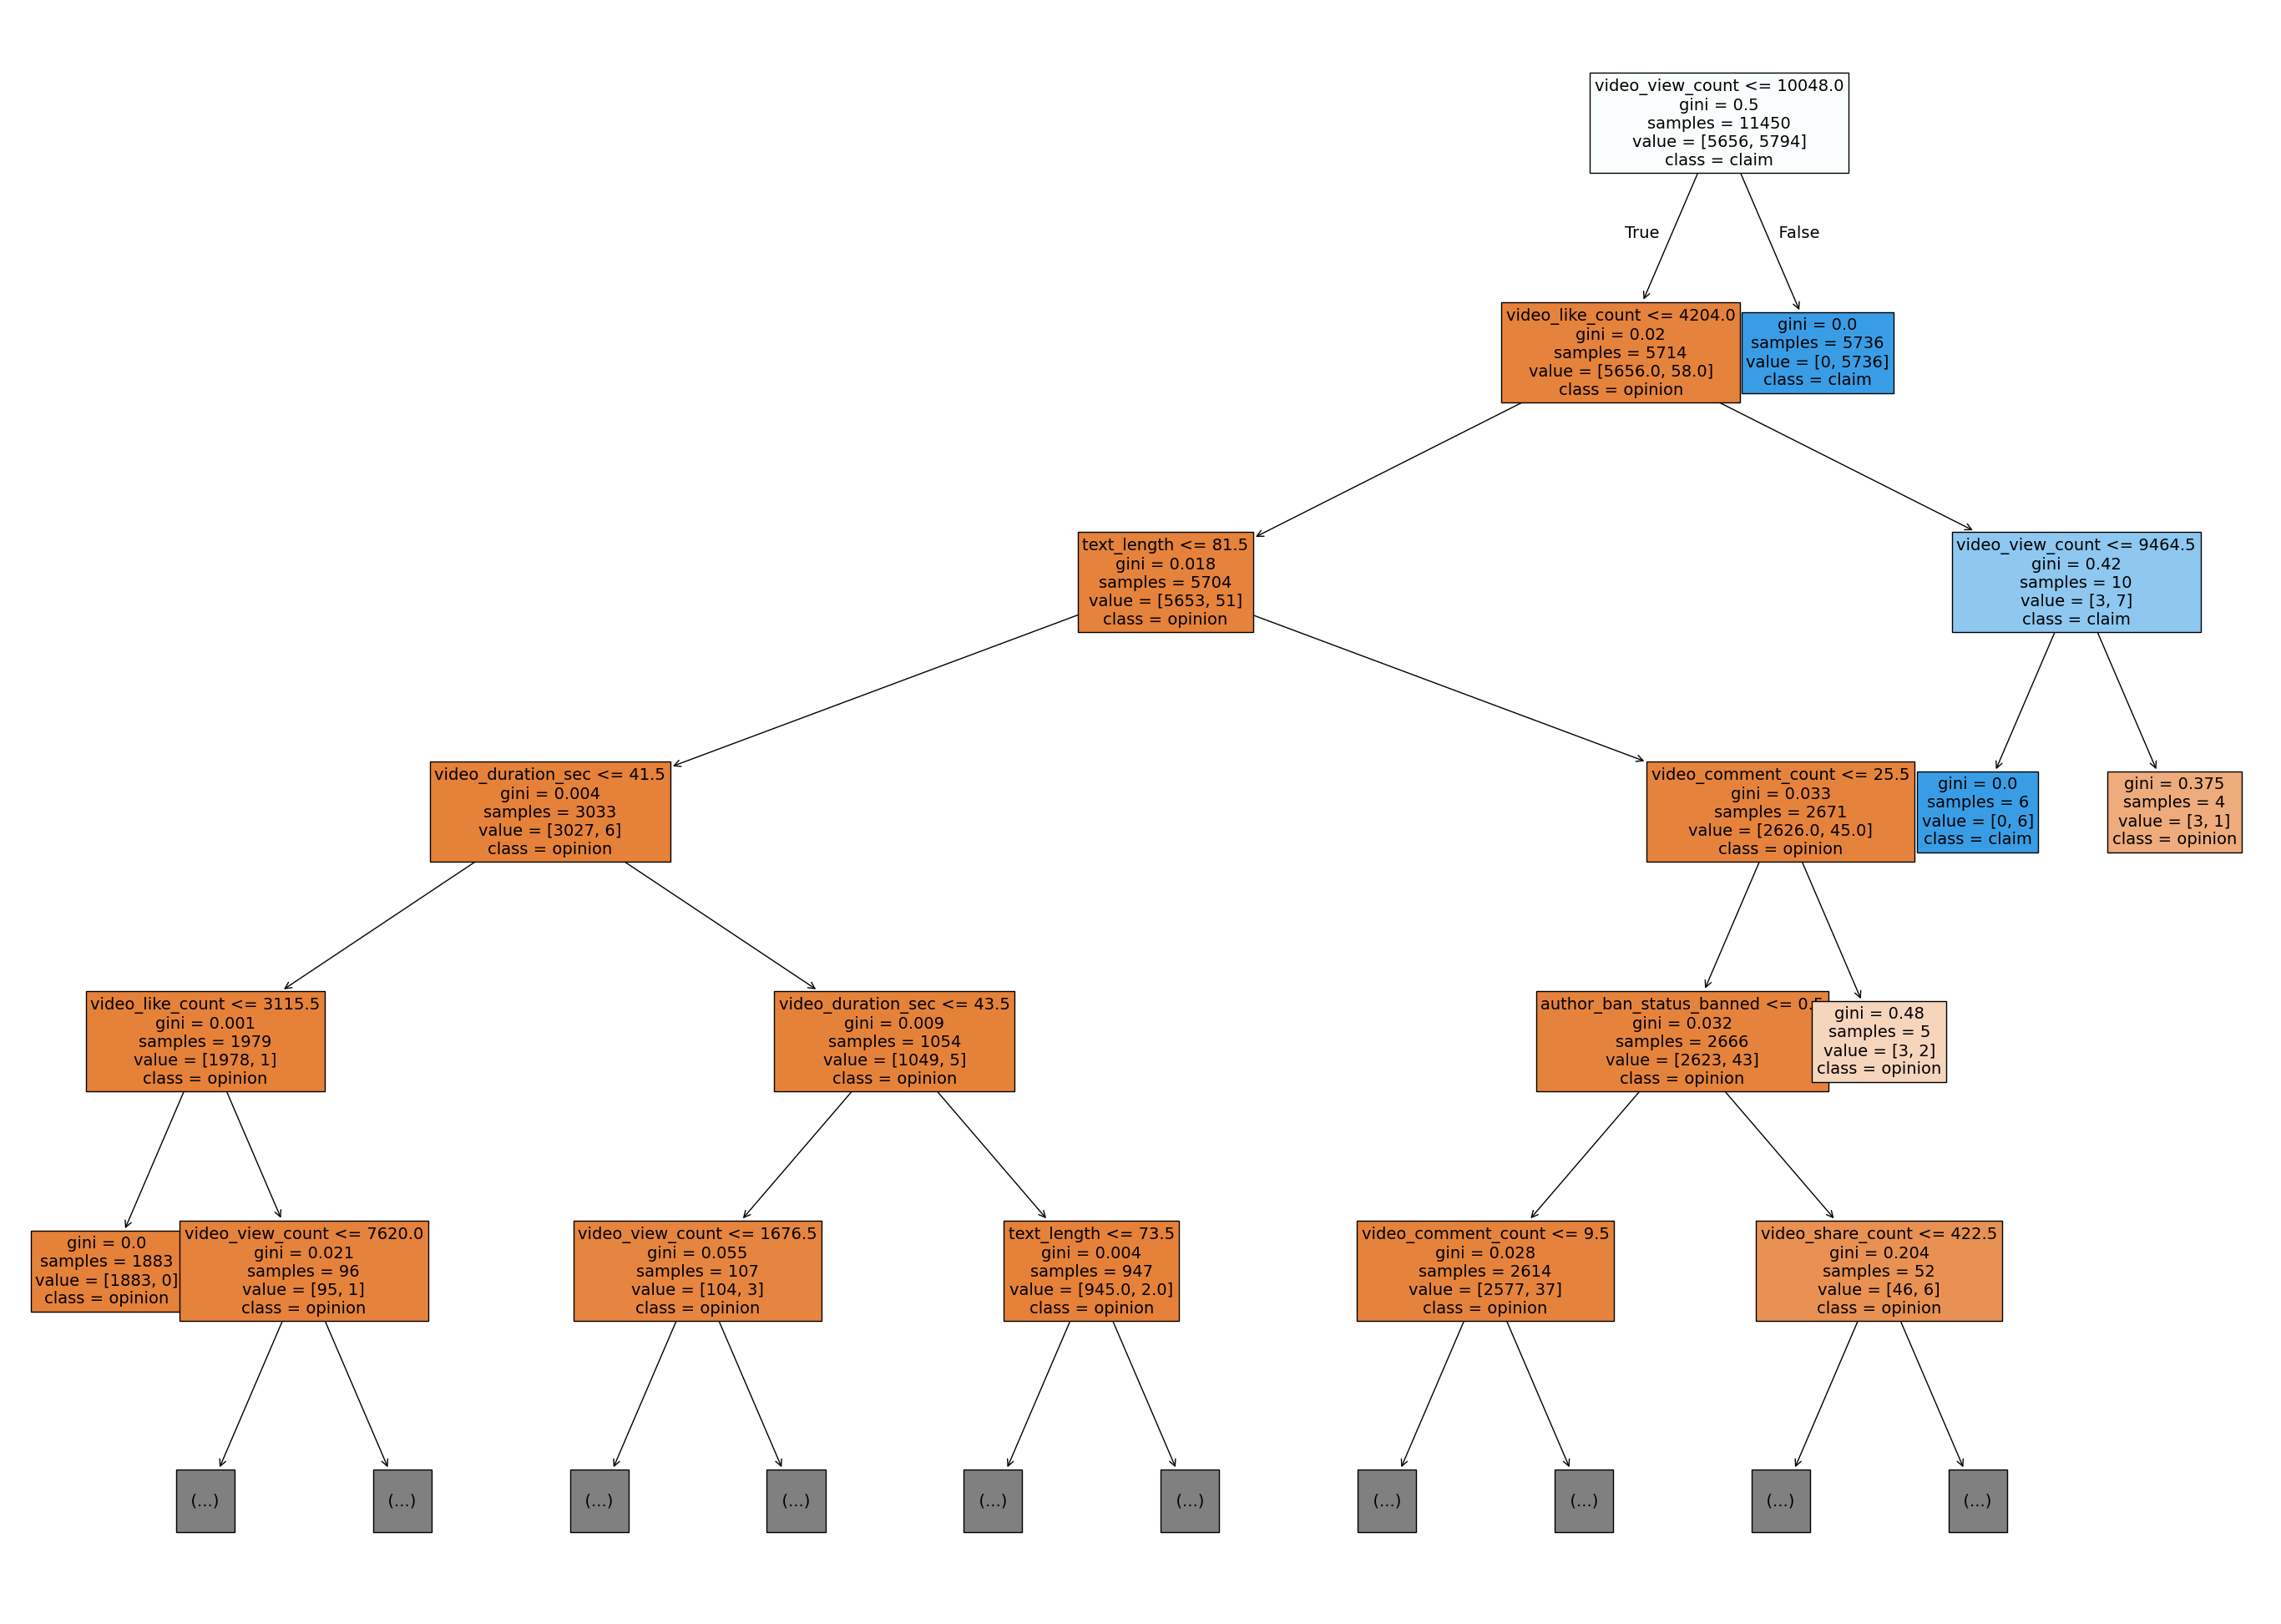

In [ ]:
plt.figure(figsize=(35,25))
plot_tree(clf.best_estimator_, max_depth = 5, fontsize=14, feature_names = X.columns,
         class_names = {0: 'opinion', 1: 'claim'}, filled=True)

plt.show()

As can be seen, the root node reveals that the video view count is the most critical feature for initial classification. Videos with fewer than 10,048 views are predominantly categorized as "opinion," while those with higher views tend to lean towards "claim." Subsequent splits are determined by factors like text length and video like count, indicating that audience engagement metrics and content attributes play significant roles in defining the nature of the video.

As the tree progresses, nodes highlight nuanced decision boundaries. For example, shorter videos with low like counts are consistently classified as "opinion," while higher engagement metrics (like comment counts or text length) push classifications closer to "claim." Interestingly, attributes such as whether the author has a banned status also influence the classification, suggesting that contextual factors about the creator can impact the decision. Overall, the tree captures a hierarchy where audience interaction and content traits are pivotal in distinguishing between claims and opinions.








## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [ ]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_pred = rf_cv.best_estimator_.predict(X_val)

Display the predictions on the encoded testing set.

In [ ]:
# Display the predictions on the encoded testing set
y_pred

array([1, 0, 1, ..., 1, 1, 1])

Display the true labels of the testing set.

In [ ]:
# Display the true labels of the testing set
y_val

,claim_status
5846,1
12058,0
2975,1
8432,1
6863,1
...,...
6036,1
6544,1
2781,1
6426,1


Create a confusion matrix to visualize the results of the classification model.

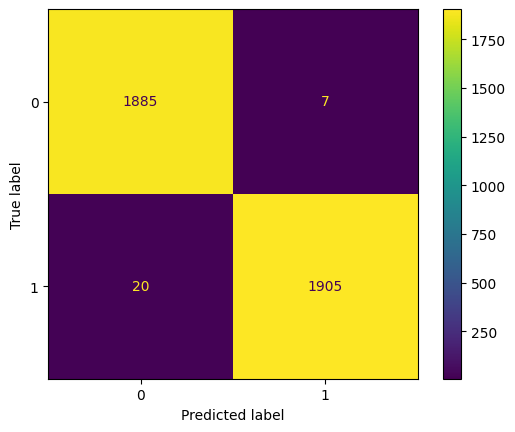

In [ ]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [ ]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

The random forest performs well, with a good recall, precision, F1-score, and few false negatives (20) and false positives (7), meaning that it's making nearly perfect classifications for both claim and opinion.

#### **XGBoost**

In [ ]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(X_val)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

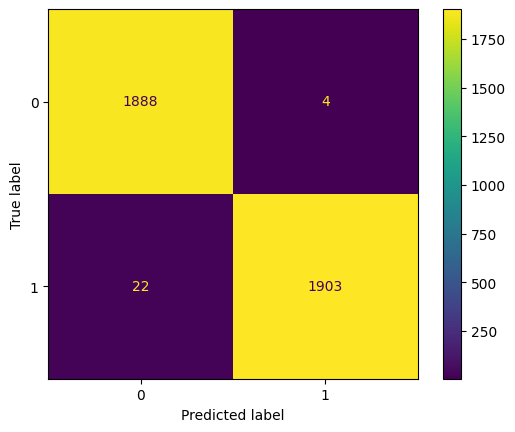

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [ ]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

The XGBoost also performs well, with a good recall, precision, F1-score, and few false negatives (22) and false positives (4), meaning that it's making nearly perfect classifications for both claim and opinion. The only difference from the random forest is that the random forest has the best recall.

#### **Decision tree**

In [ ]:
#Evaluate Decision tree model
y_pred = clf.best_estimator_.predict(X_val)

In [ ]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

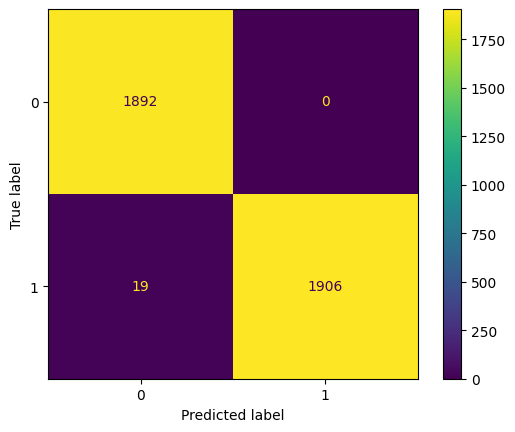

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [ ]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1892
       claim       1.00      0.99      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** Describe your Decision model results. How does your Decision model compare to the other models?

The Decision tree has a perfect performance, with a good recall, precision, F1-score, only 19 false negatives and no false positives, meaning that it's making nearly perfect classifications for both claim and opinion. The decision tree has the best recall between the three models, and also a incredible f1-score for both opinion and claims, presenting a good balance between precision and recall. Therefore, the decision tree is the champion model.

### **Use champion model to predict on test data**

In [ ]:
### YOUR CODE HERE ###
y_pred = clf.best_estimator_.predict(X_test)

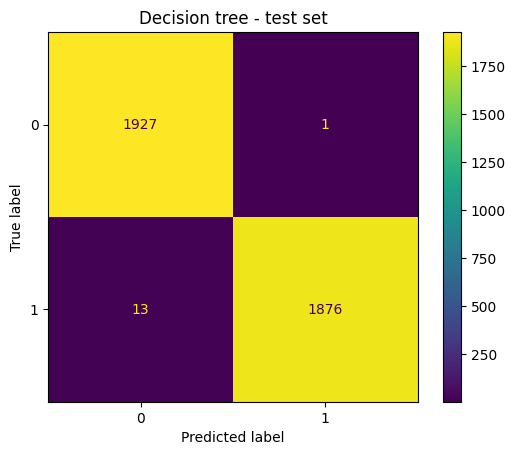

In [ ]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Decision tree - test set');
plt.show()

#### **Feature importances of champion model**


In [ ]:
importances = clf.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

forest_importances

forest_importances_df = forest_importances.reset_index()

forest_importances_df.columns = ['feature', 'score']

In [ ]:
forest_importances_df

,feature,score
0,video_view_count,0.994985
1,video_like_count,0.001694
2,video_download_count,0.001643
3,video_comment_count,0.000540
4,video_share_count,0.000536
5,text_length,0.000211
6,video_duration_sec,0.000205
7,author_ban_status_banned,0.000185
8,verified_status_verified,0.000000
9,author_ban_status_under review,0.000000


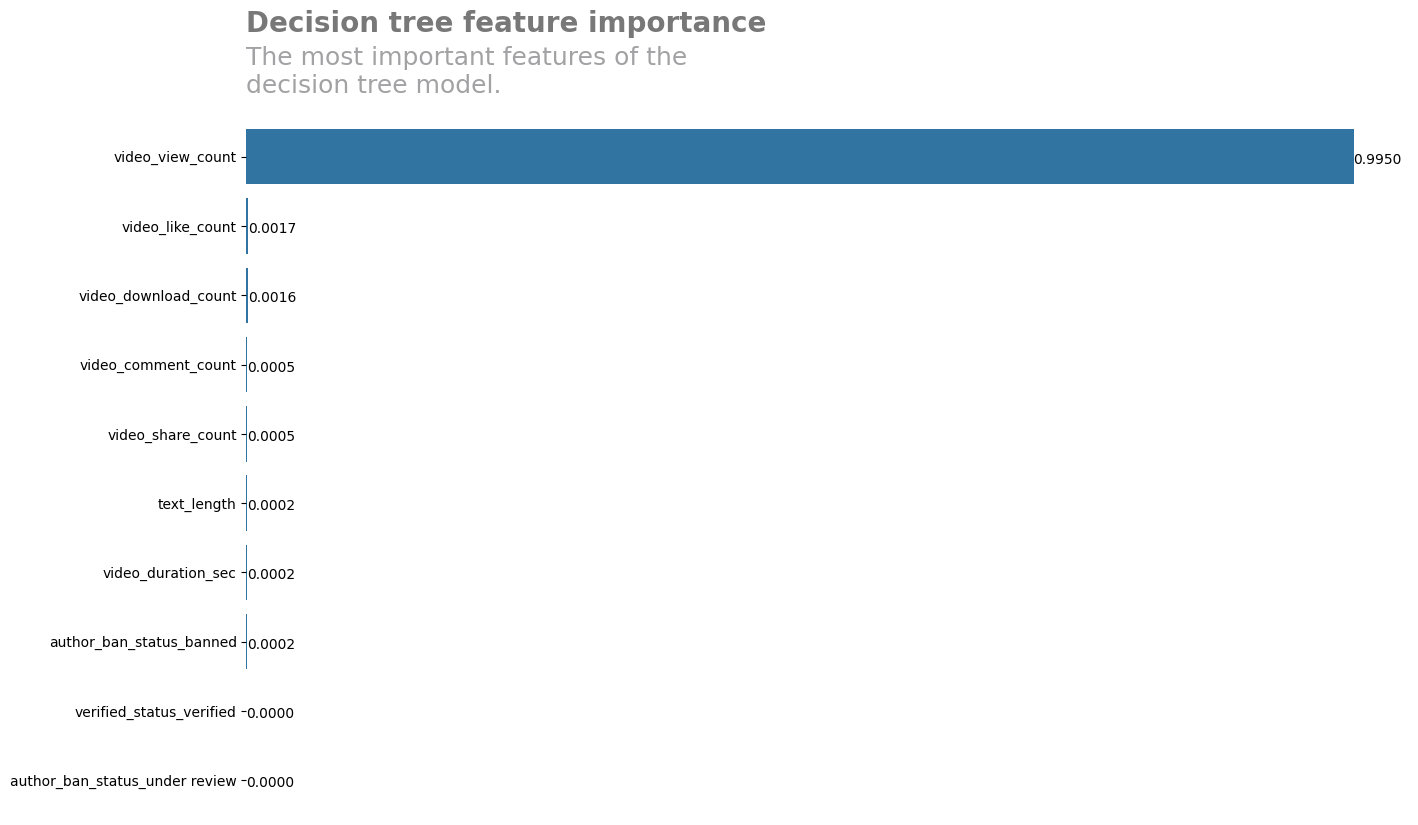

In [ ]:
# defining some colors
GREY1, GREY2, GREY3= "#CFCDCE", "#A2A1A3", "#787878"

# plotting the bar chart
fig, ax = plt.subplots(figsize= (15,9))
n_plots = 21
palette = sns.color_palette("Blues_d", n_colors=n_plots)
palette.reverse()
with palette:
  ax = sns.barplot(y='feature' ,x='score', data=forest_importances_df)
  # plotar título
  plt.text(0, -1.8, 'Decision tree feature importance',
          fontsize=20,
          color=GREY3,
          weight='bold')

  # plotar subtitulo
  plt.text(0, -1.6,
          "The most important features of the \n"
          "decision tree model.",
          verticalalignment="top",
          fontsize=18,
          color=GREY2)

  initialx=0

  #remover grid
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  #remover titulos
  ax.set_ylabel('')
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)

  #adicionar labels
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:.4f}'.format(p.get_width()))
    initialx+=1
  plt.show()

**Question:** Describe your most predictive features. Were your results surprising?

The feature importance graph from the decision tree model reveals that the number of video views (`video_view_count`) is by far the most predictive feature, with an importance score of 0.9950. This suggests that a video's popularity, as measured by views, is a crucial factor in its classification as either "claim" or "opinion." The other engagement features, such as like count (0.0017), download count (0.0016), and comment count (0.0005), have significantly lower importance, indicating that user interaction plays a secondary role in defining the content. However, in general, as previous EDA analyses pinpointed, engagement features represent a good predictive power on whether a video is a claim or an opinion.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


1. **Would you recommend using this model? Why or why not?** It is recommended to use this decision tree model to classify TikTok videos as "claim" or "opinion." The model has demonstrated exceptional performance, achieving an accuracy of 100% with impressive precision and recall scores for both classes. This level of accuracy indicates that the model can effectively distinguish between the two categories, which is critical for efficiently managing user reports and reducing backlog.

2. **What was your model doing? Can you explain how it was making predictions?**
The decision tree model operates by making sequential decisions based on the features of the videos, allowing it to classify each video into one of the two categories: "claim" or "opinion." It evaluates the most important features, primarily the number of video views, and then branches out based on other lesser features, such as likes and comments. Each branch represents a decision point based on the feature values, leading to a final classification at the leaves of the tree. The model effectively leverages the most predictive features to arrive at an accurate classification.

3. **Are there new features that you can engineer that might improve model performance?**
Yes, potential new features can be engineered to improve model performance. These include sentiment analysis scores of the video captions, the use of natural language processing (NLP) techniques to evaluate the context of the comments, and user engagement metrics over time (e.g., trends in likes and shares). Additionally, incorporating time-based features, such as how long a video has been active on the platform, can provide insights into its relevance and engagement dynamics.

4. **What features would you want to have that would likely improve the performance of your model?**
To enhance model performance, it is beneficial to include features such as the sentiment score of the video's captions, which can help determine whether the content leans more towards opinion or factual claims. Other desirable features include the frequency of user engagement metrics (likes, shares, comments) over time, as well as metadata about the video's creator, such as their credibility or history of content, which can influence the classification.

#### Recommendations for Stakeholders
Given the model's outstanding performance, the company should implement this decision tree classifier as an integral part of TikTok's content moderation system. By prioritizing videos flagged by users, the system can efficiently handle reports, ensuring that claims and opinions are accurately categorized. This will enhance user experience by addressing concerns more swiftly and support the platform's commitment to maintaining a safe and informative environment.

Furthermore, the company should invest in the engineering of additional features to continuously refine the model. By incorporating sentiment analysis and user engagement dynamics, TikTok can further enhance the model's predictive capabilities. This proactive approach will enable the platform to stay ahead of evolving content trends and user behaviors, ensuring that moderation efforts remain effective and aligned with user expectations.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.